In [20]:
import cv2
import matplotlib.pyplot as plt

In [28]:
root = './renders/'

In [29]:
file_name = '0_65'

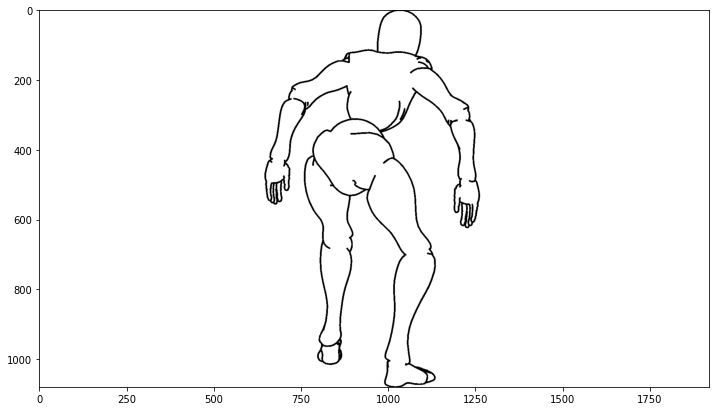

In [32]:
render = cv2.imread(root + file_name + '.png', cv2.IMREAD_UNCHANGED) 
trans_mask = render[:,:,3] == 0

render[trans_mask] = [255, 255, 255, 255]

render = cv2.cvtColor(render, cv2.COLOR_BGRA2BGR)

plt.figure(figsize=(12, 10))
plt.imshow(render)
plt.show()

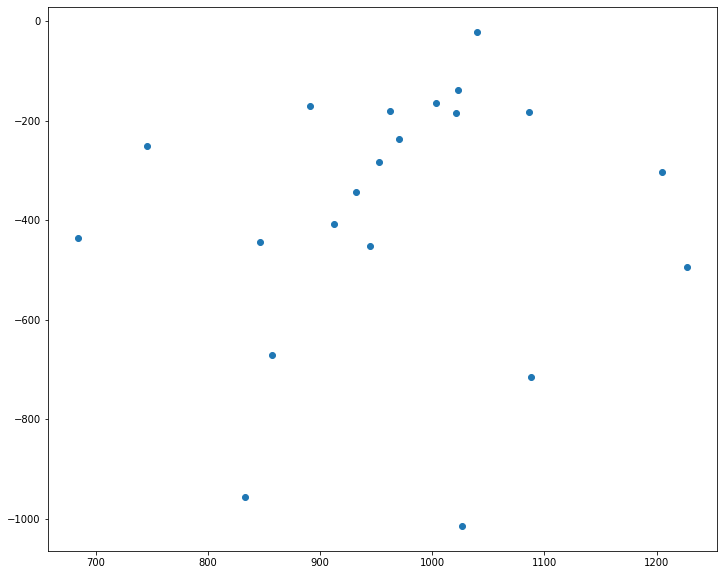

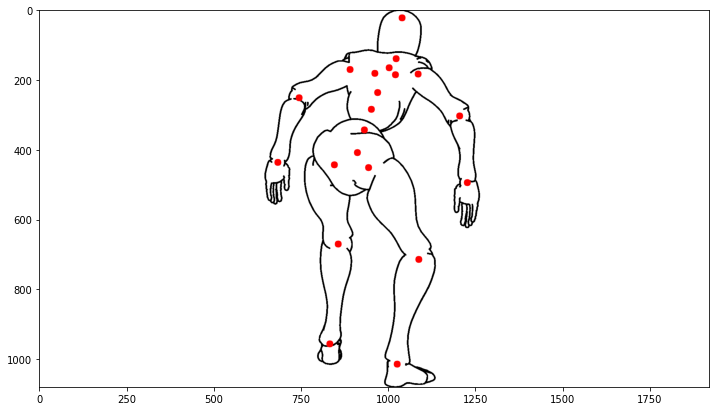

In [33]:
image = render.copy()
xs, ys, zs = [], [], []

def read_bones(path, image):
    file = open(path)
    for bone in file:
        if len(bone) < 5:
            break
        name, x, y = bone.split()
        x = int(x)
        y = int(y)
        xs.append(x)
        ys.append(-y)
        image = cv2.circle(image, (int(x), int(y)), radius=10, color=(255, 0, 0), thickness=-1)

    return image
        
image = read_bones(root + 'skeleton/' + file_name, image)
plt.figure(figsize=(12, 10))
plt.scatter(xs, ys)
plt.show()

plt.figure(figsize=(12, 10))
plt.imshow(image)
plt.show()
